In [4]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If only plt is imported

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Setting a custom style for seaborn
sns.set(style='whitegrid')

## Data Import and Cleaning
In this section, we read the CSV file, inspect the data structure, and perform initial cleaning steps such as dealing with missing values and duplicate records. Note that similar data import issues might be encountered by other notebook creators, so care is taken to handle them gracefully.

In [6]:
# Read the dataset
data_path = 'health_lifestyle_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataframe
print('Initial shape of dataframe:', df.shape)
df.head()

Initial shape of dataframe: (100000, 16)


id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  disease_risk  
0          240               0             0  
1          207               0             0  
2          296               0             0  
3          175               0             0  
4          294               0             0

In [7]:
# Data Cleaning and Preprocessing

# Remove duplicate records if any
initial_count = df.shape[0]
df.drop_duplicates(inplace=True)
print('Removed {} duplicate rows.'.format(initial_count - df.shape[0]))

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# For this dataset, we assume missing values are minimal and can be dropped
if missing_values.sum() > 0:
    df.dropna(inplace=True)
    print('Dropped rows with missing values.')

# Converting the data types if necessary (e.g., date parsing if there were dates available)
# In this dataset, we do not have date columns but if we had, we would use pd.to_datetime

print('Data types after cleaning:')
print(df.dtypes)

Removed 0 duplicate rows.
Missing values in each column:
id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64
Data types after cleaning:
id                     int64
age                    int64
gender                object
bmi                  float64
daily_steps            int64
sleep_hours          float64
water_intake_l       float64
calories_consumed      int64
smoker                 int64
alcohol                int64
resting_hr             int64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
family_history         int64
disease_risk           int64
dtype: object


## Exploratory Data Analysis
The following section provides a number of visualizations to gain insights into the dataset. We explore distributions, relationships between numerical features, and various categorical breakdowns. We will use multiple visualization techniques including heatmaps, pair plots, histograms, pie charts, bar plots and more.

In [8]:
# Basic EDA: Summary statistics and info
print('Dataset shape:', df.shape)
print('\nSummary statistics:')
print(df.describe())

print('\nValue counts for gender:')
print(df['gender'].value_counts())

Dataset shape: (100000, 16)

Summary statistics:
                  id            age            bmi   daily_steps  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean    50000.500000      48.525990      29.024790   10479.87029   
std     28867.657797      17.886768       6.352666    5483.63236   
min         1.000000      18.000000      18.000000    1000.00000   
25%     25000.750000      33.000000      23.500000    5729.00000   
50%     50000.500000      48.000000      29.000000   10468.00000   
75%     75000.250000      64.000000      34.500000   15229.00000   
max    100000.000000      79.000000      40.000000   19999.00000   

         sleep_hours  water_intake_l  calories_consumed         smoker  \
count  100000.000000   100000.000000      100000.000000  100000.000000   
mean        6.491784        2.751496        2603.341200       0.200940   
std         2.021922        1.297338         807.288563       0.400705   
min         3.000000        0.500000      

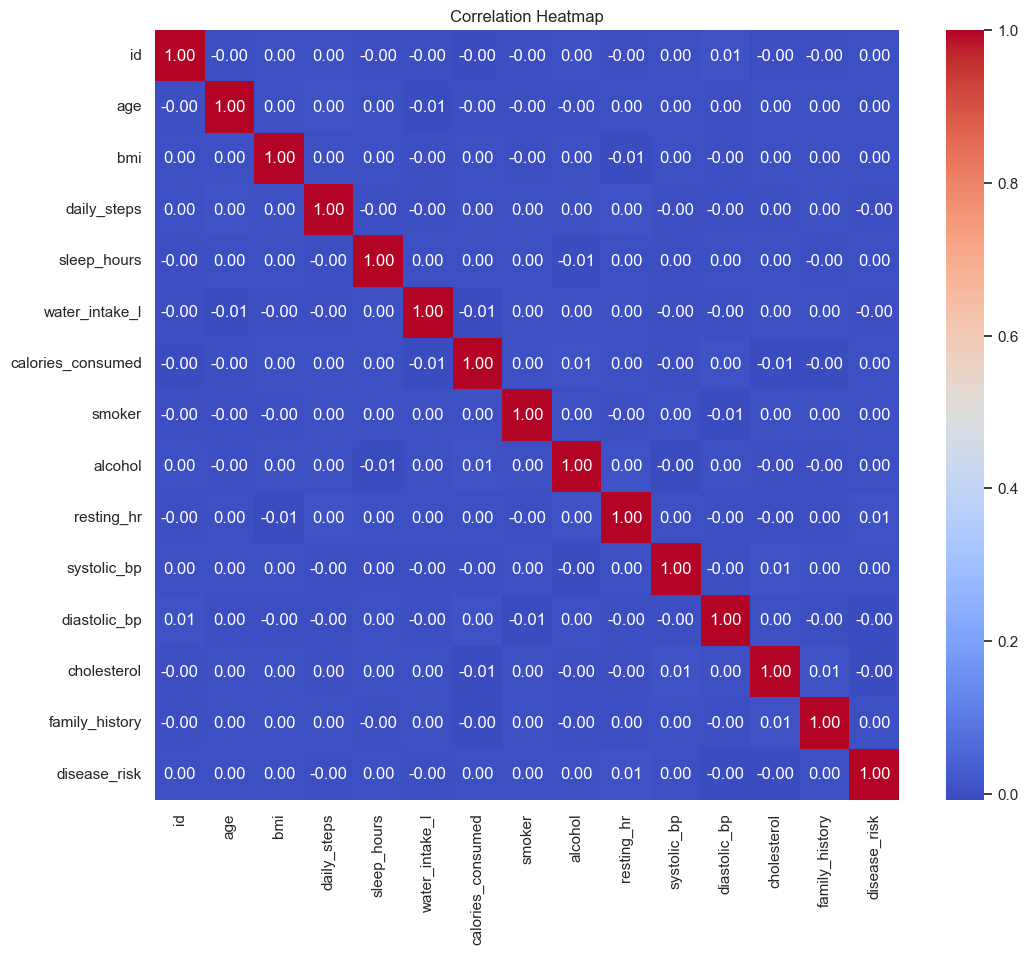

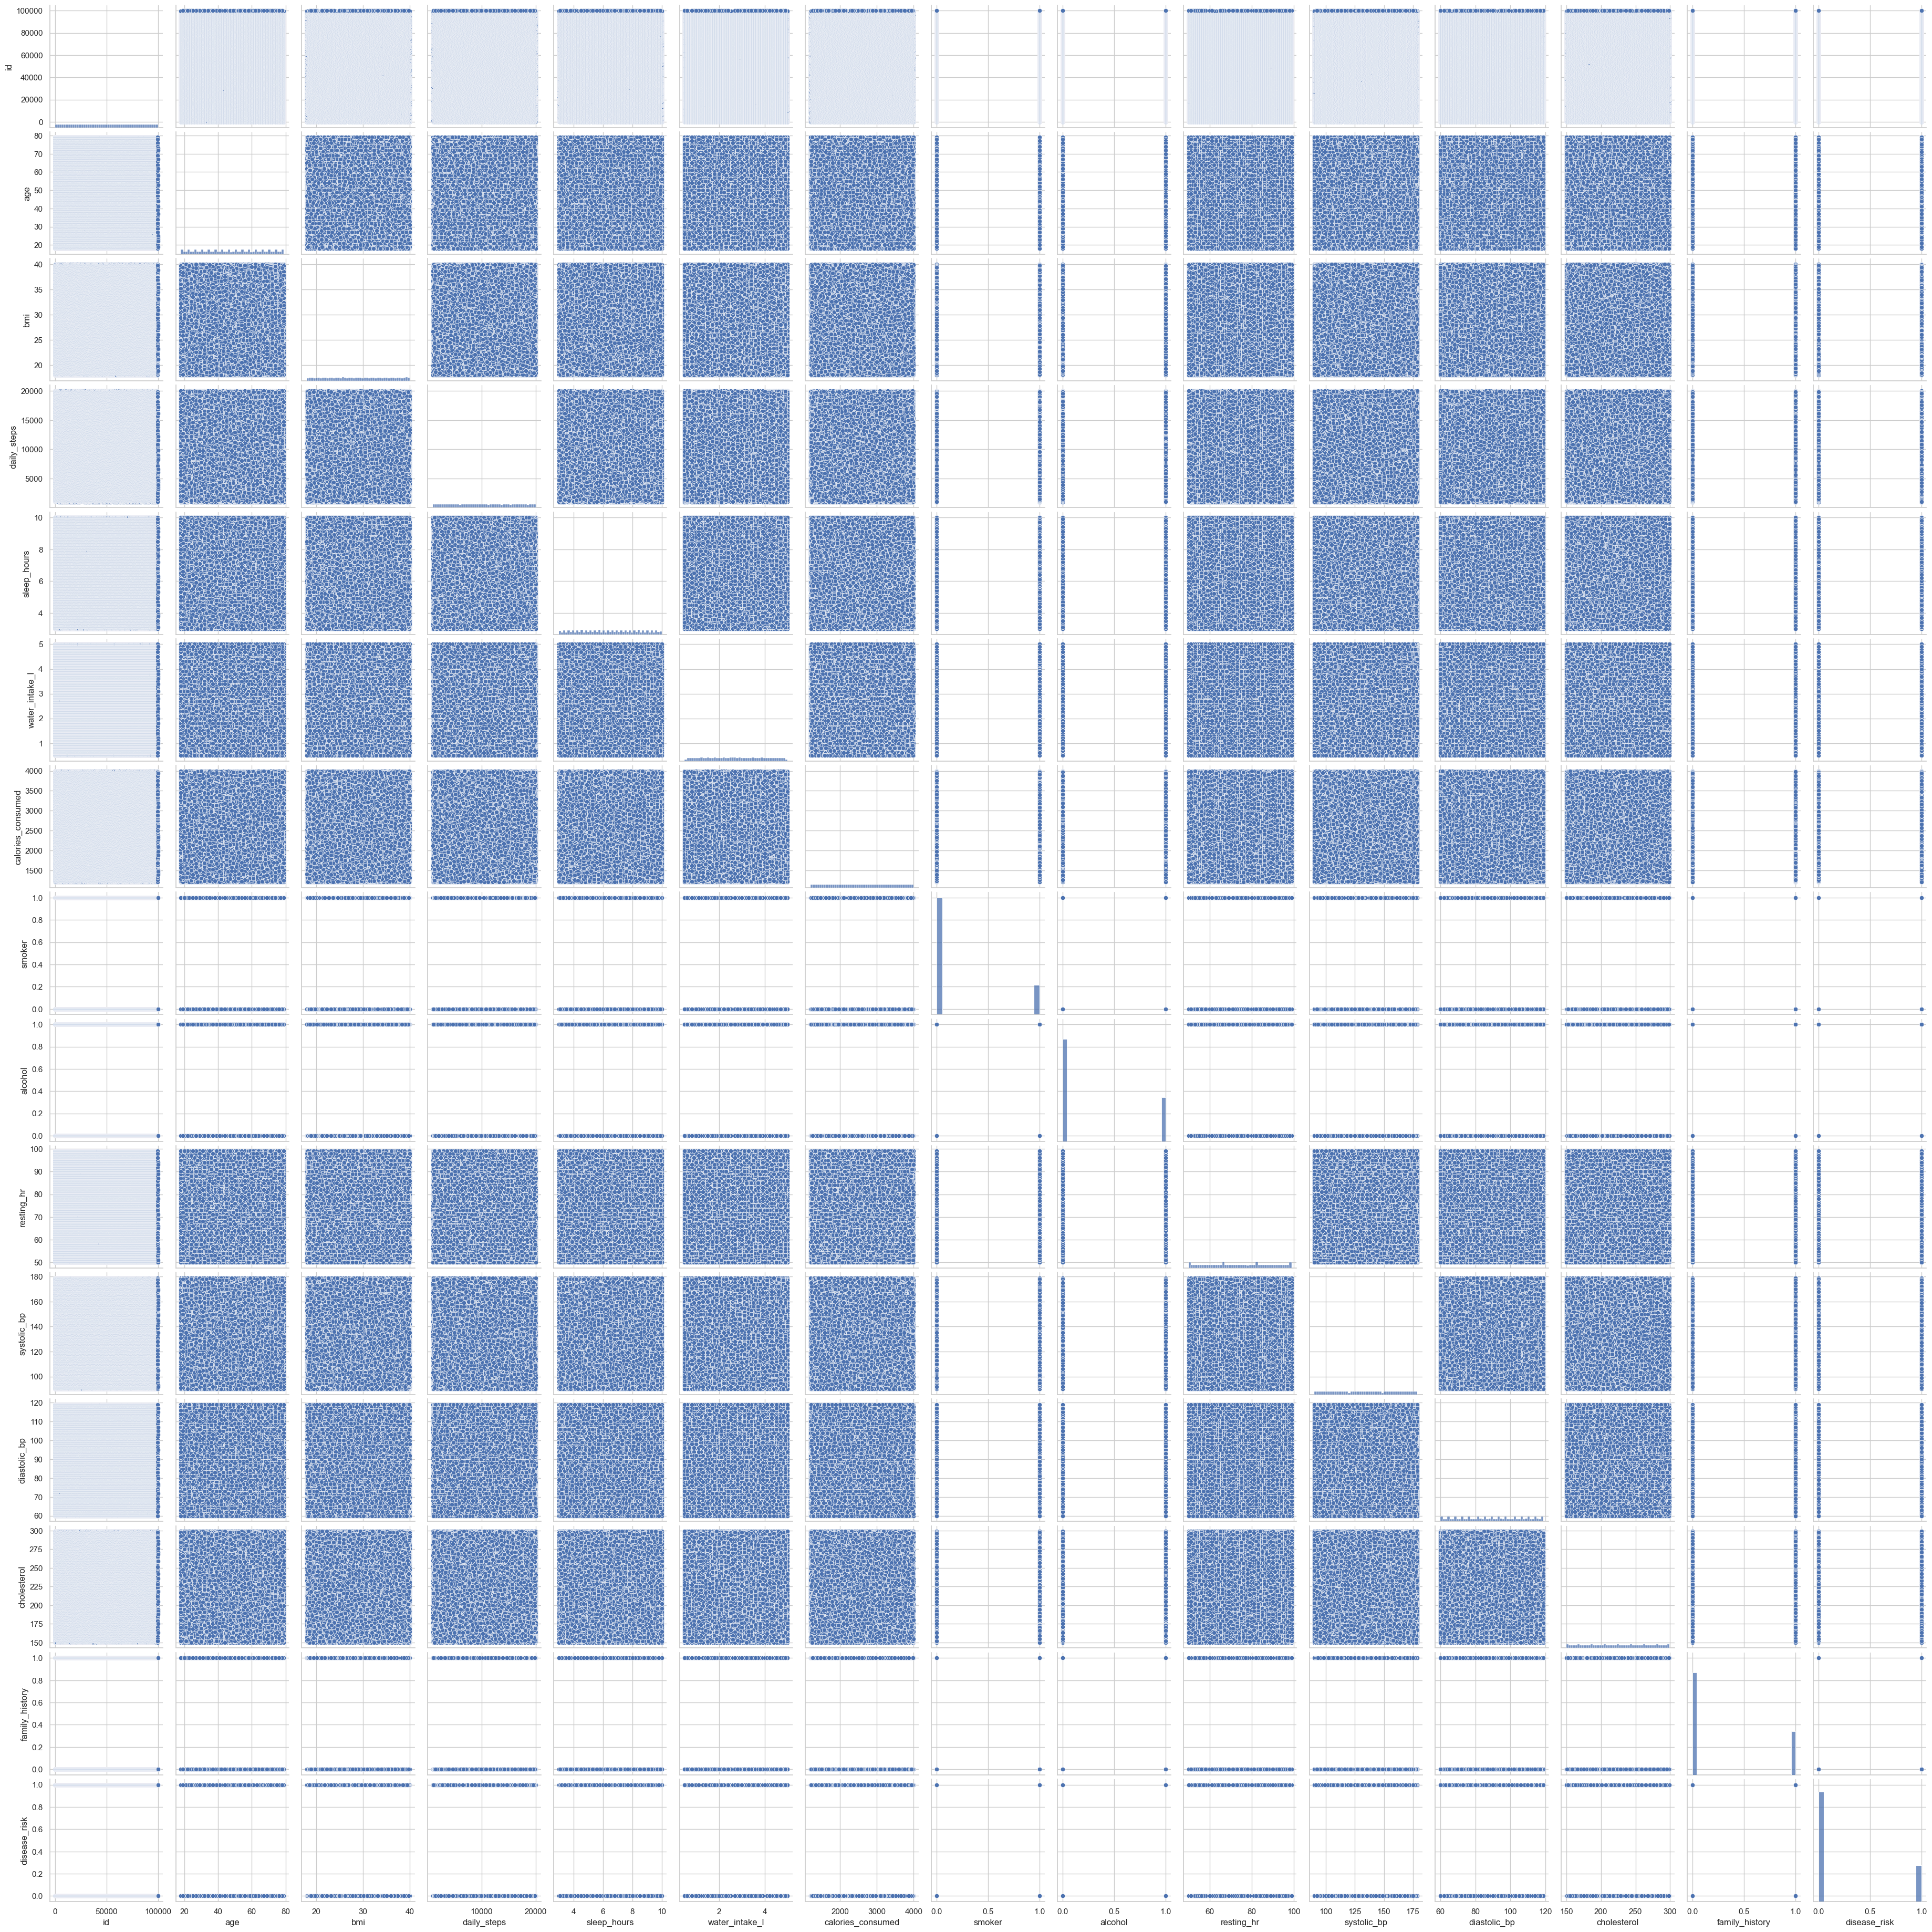

In [9]:
# Visualization 1: Correlation Heatmap
# Filtering only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Only plot the heatmap if there are 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12,10))
    heatmap = sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.savefig('correlation_heatmap.png')
    plt.show()
else:
    print('Not enough numeric columns to generate a correlation heatmap.')

# Visualization 2: Pair Plot
# A pair plot gives an overview of pairwise relationships between numerical variables
sns.pairplot(numeric_df)
plt.savefig('pairplot.png')
plt.show()

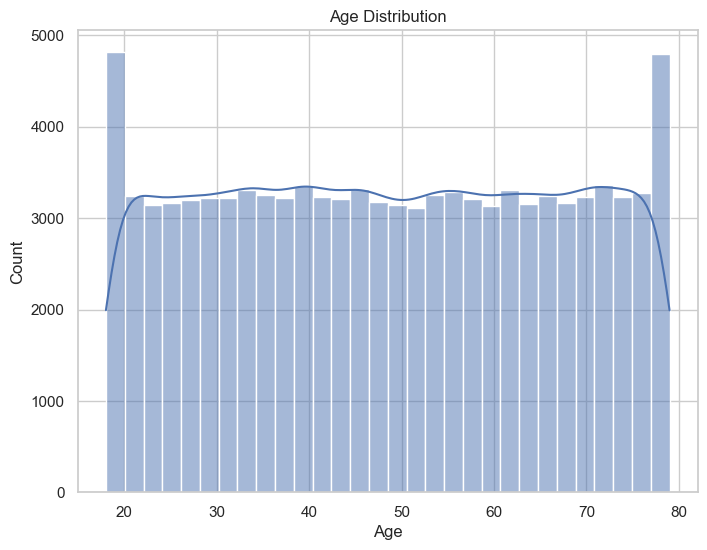

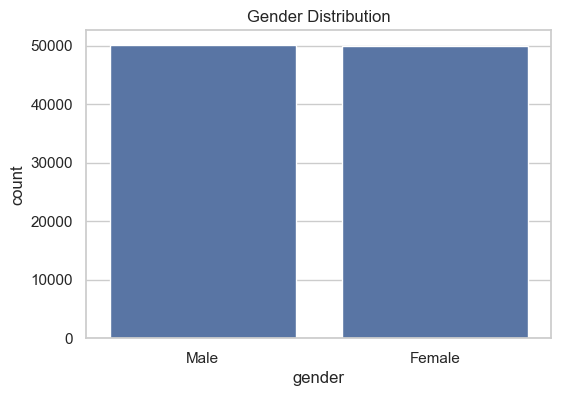

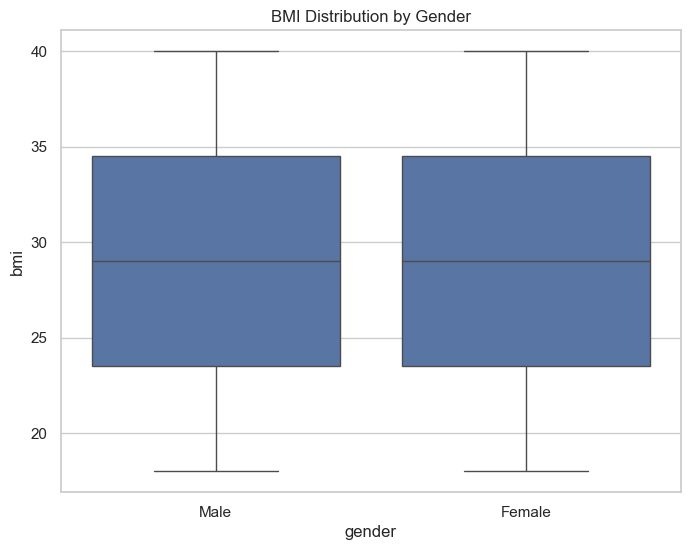

In [10]:
# Additional Visualizations

# Histogram for Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_histogram.png')
plt.show()

# Count plot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.savefig('gender_count.png')
plt.show()

# Box Plot for BMI vs. Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI Distribution by Gender')
plt.savefig('bmi_boxplot.png')
plt.show()

## Predictor for Disease Risk
Based on the data, it appears that various factors may influence disease risk. In this section, we build a classifier to predict the 'disease_risk'. For simplicity, we assume a binary classification scenario (for example, 0 for low risk and 1 for high risk). If the dataset uses multiple classes, a multiclass classifier could be applied. We follow standard practices like train/test splitting, model training and evaluation using accuracy and confusion matrix. If you see any errors during model training, note that it is important to ensure data compatibility and scaling of the predictor variables.

Accuracy Score: 0.7509


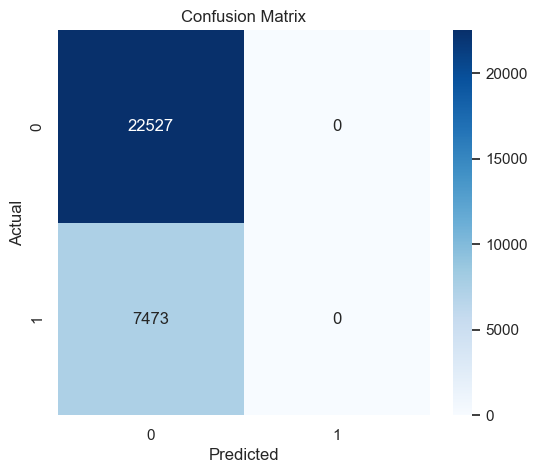

In [12]:
# Prepare the data for modeling

# For predictor, we remove identifier columns and non-numeric categorical columns
# Here, we drop 'id' and 'gender' (which is categorical), though one could encode gender if needed
features = df.drop(columns=['id', 'gender', 'disease_risk'])
target = df['disease_risk']

# Optional: If gender is believed to hold predictive power, one can encode it using pd.get_dummies
# df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Building a logistic regression model for classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

## Conclusion
In this notebook, we imported and cleaned a health and lifestyle dataset, explored various insights using numerous visualization techniques, and finally built a predictive model to forecast disease risk. Our approach demonstrates the use of practical data science techniques from data cleaning to model evaluation. Future work could include exploring more complex models such as ensemble methods, feature engineering (possibly encoding categorical variables like gender), and perhaps incorporating temporal analysis if date-based data becomes available.

If you found this notebook useful, please consider upvoting it.